
Silvio Orozco Vizquerra 18282     
 Universidad del Valle de Guatemala  
 Data Mining
 
 Guatemala 15 de abril del 2020
  
 
# Regression Analysis



## Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar el dataset


In [2]:
data = pd.read_csv("insurance.csv")

## Exploración de datos

**Check the head of data**

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Usar info() y describe() para obtener un análisis general de la información**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [5]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


Revisamos si hubieran datos faltantes, pero no hay ninguno

In [6]:
miss_values_count = data.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]
print(miss_values_count) 

Series([], dtype: int64)


## Exploratory Data Analysis


**Histograma Edad**
Crear un histograma sobre la columna Age

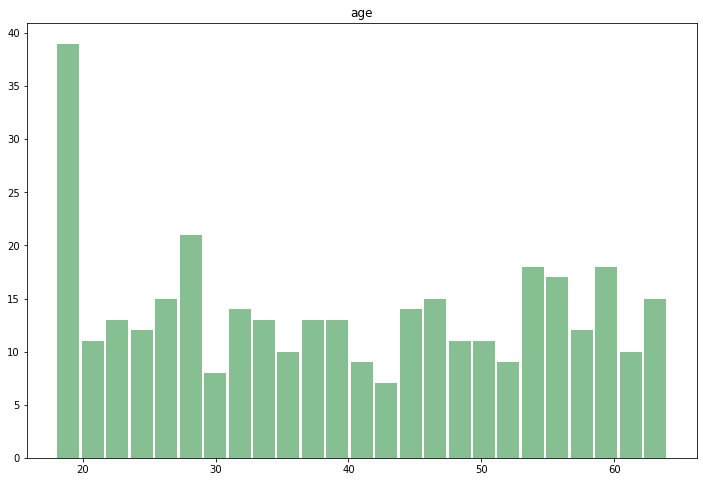

In [7]:
hist = data.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9,column='age')

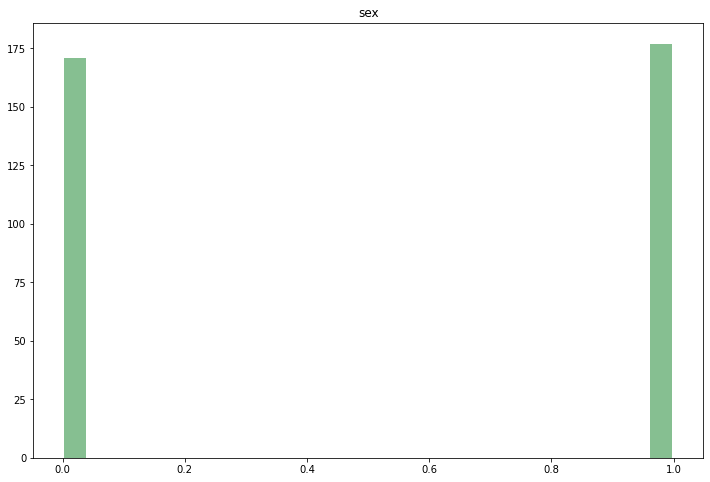

In [8]:
hist = data.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9,column='sex')

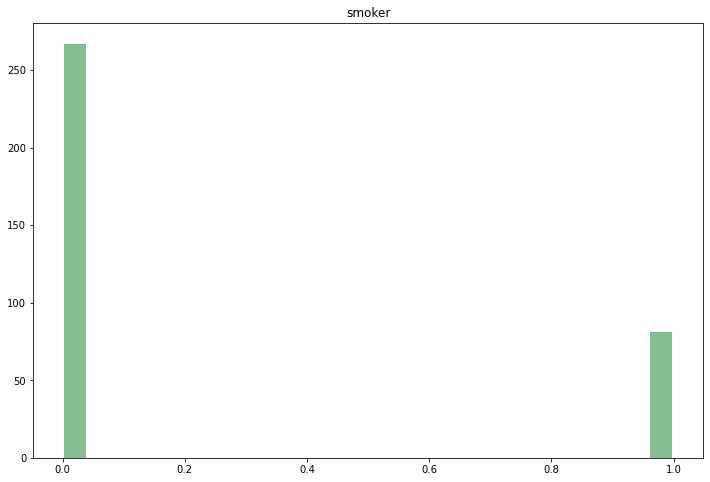

In [14]:
hist = data.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9,column='smoker')

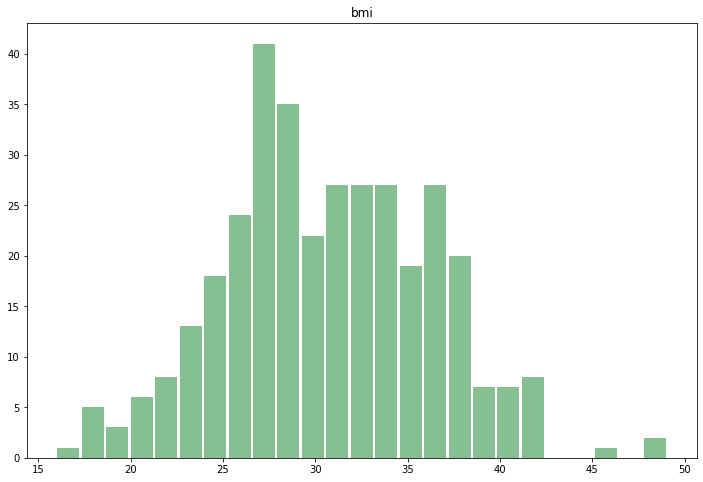

In [15]:
hist = data.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9,column='bmi')

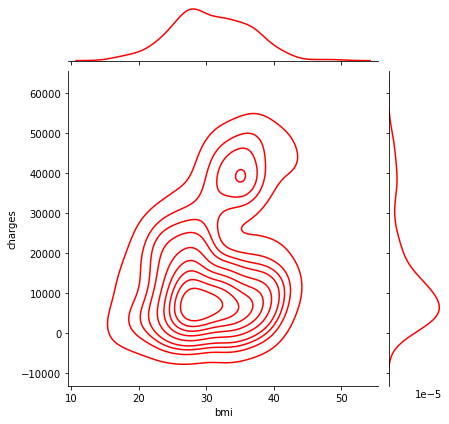

In [16]:
sns.jointplot(data=data, x="bmi", y="charges",color='red',kind='kde')

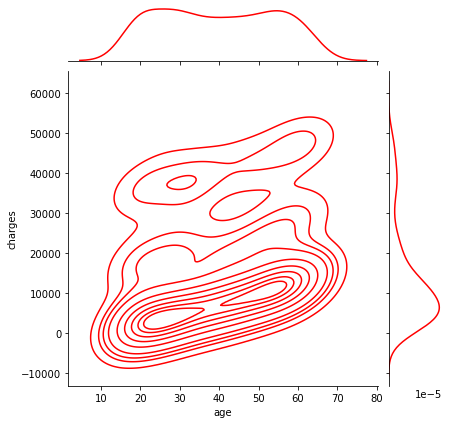

In [17]:
sns.jointplot(data=data, x="age", y="charges",color='red',kind='kde')

**Obtenemos un pair plot dividiendo a la población por sexo'**

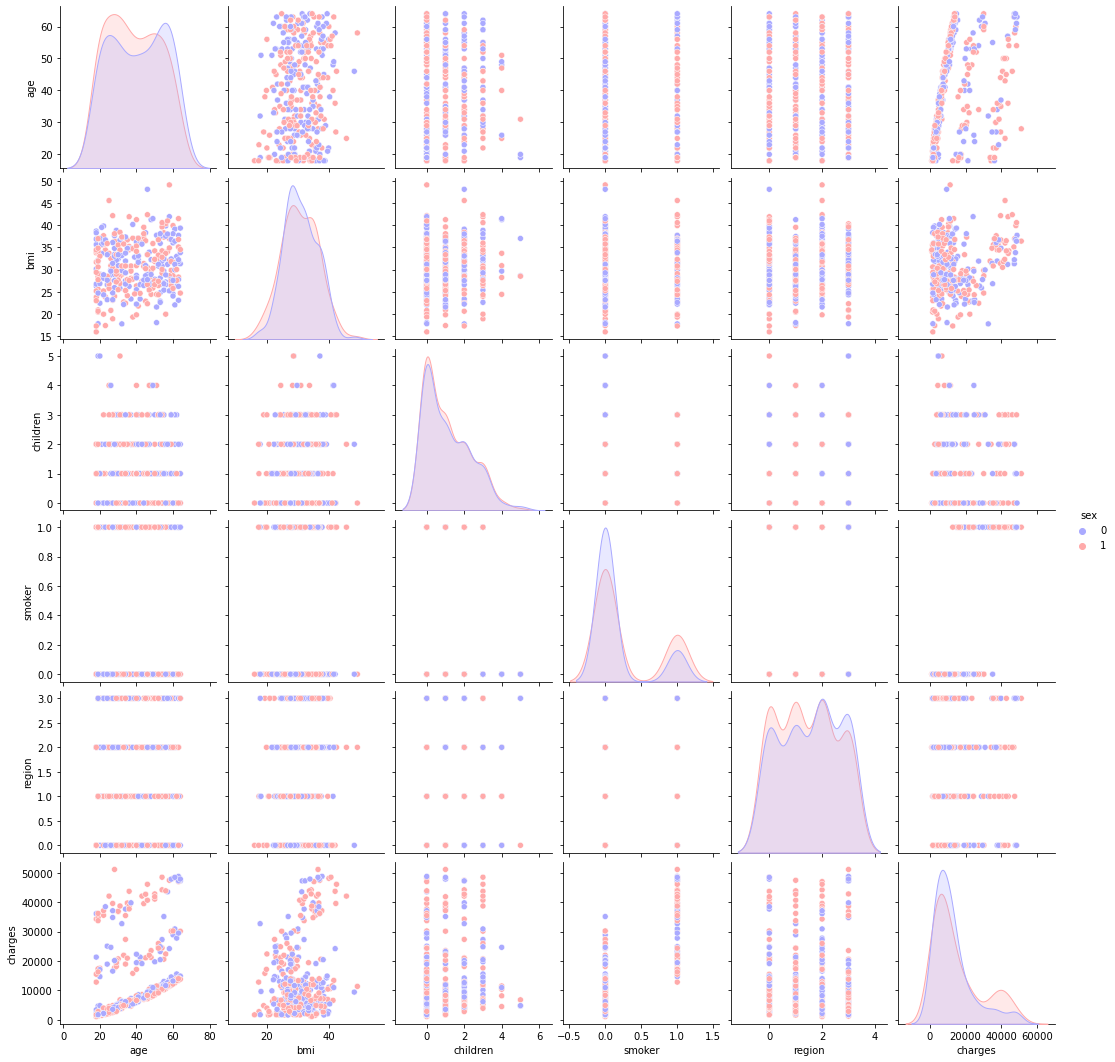

In [18]:
sns.pairplot(data, hue="sex", palette="bwr")

**Obtenemos un pair plot dividiendo a la población por fumadores'**

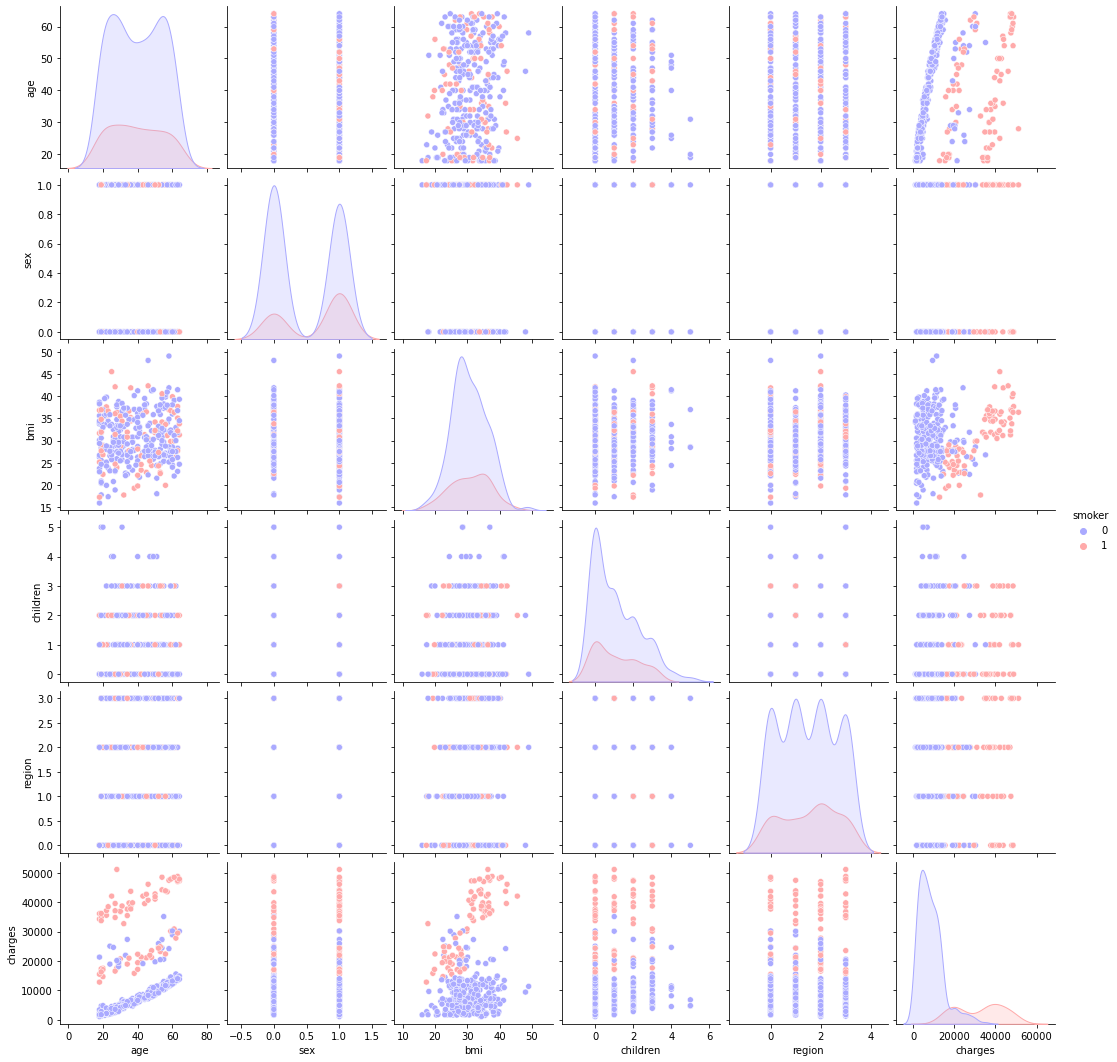

In [19]:
sns.pairplot(data, hue="smoker", palette="bwr")

## Preparación de los datos - Data Categórica




Aquí aprendimos a usar label encoder y on hot encoder si fuera necesario. En nuestro caso, ya se encuentra encodeado pero lo haremos de nuevo.

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [10]:
le.fit(data.sex)

LabelEncoder()

In [11]:
le.classes_

array([0, 1], dtype=int64)

In [12]:
sex_encoded= le.transform(data.sex)

In [13]:
sex_encoded

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [14]:
data['sex_encoded'] = le.transform(data.sex)

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1


In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
enc = OneHotEncoder(handle_unknown='ignore')

In [18]:
enc.fit(data[['region']])

OneHotEncoder(handle_unknown='ignore')

In [19]:
enc.categories_

[array([0, 1, 2, 3], dtype=int64)]

In [20]:
encoded_region = enc.transform(data[['region']])

In [21]:
data = data.join(pd.DataFrame(encoded_region.toarray(), columns=enc.categories_))

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,"(0,)","(1,)","(2,)","(3,)"
0,19,0,27.900,0,1,3,16884.92400,0,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,2,1725.55230,1,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,2,4449.46200,1,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,1,21984.47061,1,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,1,3866.85520,1,0.0,1.0,0.0,0.0


In [23]:
enc.inverse_transform(encoded_region)[0:5]

array([[3],
       [2],
       [2],
       [1],
       [1]], dtype=int64)

## División de la data para training y test

In [24]:
from sklearn.model_selection import train_test_split

In [134]:
X_exercise1 = data[['bmi']]
y_exercise1 = data['charges']
X_exercise3 = data[['age','bmi','sex_encoded','children','smoker',(0,),(1,),(2,),(3,)]]
y_exercise3 = data['charges']

c:\users\silvi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


**Usamos train_test_split para generar X_train, X_test, y_train y y_test con un 33% en el split para split. Obtenemos nuestra data con las variables en x solo bmi para el ejercicio 1 y 2. Obtenemos nuestra data con las variables age, bmi, sex_encoded y smoker para el calculo en el ejercicio 3. Nuestra variable dependiente siempre será charges.**

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_exercise1, y_exercise1, test_size=0.33)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
...     X_exercise3, y_exercise3, test_size=0.33)

## Preparación de la data Escala luego de dividir el traning data

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [138]:
scaler.fit(X_train)

StandardScaler()

In [139]:
scaler2.fit(X_train2)

StandardScaler()

In [140]:
scaled_X_train = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(scaled_X_train,columns = X_train.columns, index=X_train.index)

In [141]:
scaled_X_train2 = scaler2.transform(X_train2,)
X_train_scaled2 = pd.DataFrame(scaled_X_train2,columns = X_train2.columns, index=X_train2.index)

In [142]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [143]:
scaler.fit(X_test2)
scaled_X_test2 = scaler.transform(X_test2)
X_test_scaled2 = pd.DataFrame(scaled_X_test2,columns = X_test2.columns, index=X_test2.index)

In [144]:
scaler2.fit(X_test)
scaled_X_test = scaler2.transform(X_test)
X_test_scaled = pd.DataFrame(scaled_X_test,columns = X_test.columns, index=X_test.index)

In [145]:
X_train_scaled.head()

,bmi
54,-0.384149
201,0.255082
313,0.910565
96,-0.003139
107,0.010404


In [146]:
X_test_scaled.head()

,bmi
266,-1.836953
235,-1.417226
132,0.955450
3,-1.333107
222,0.070900


## Modelo 1 Implementación Least Squared

In [147]:
# Con ayuda de https://www.edureka.co/blog/least-square-regression/
X = X_train_scaled.values
Y = y_train.values

In [148]:
# Media x y y 
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total de datos
n = len(X)

In [149]:
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
#Printing coefficients
print("Coefficients")
print(m, c) 

Coefficients
[3409.37727974] [15103.98632378]


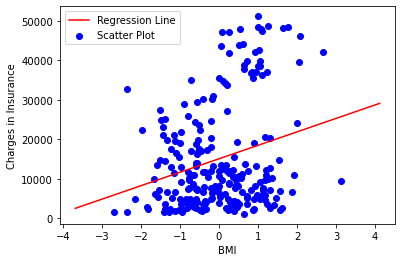

In [150]:
# Plotting Values and Regression Line
 
max_x = np.max(X) + 1
min_x = np.min(X) - 1
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.plot(x, y, color='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
 
plt.xlabel('BMI')
plt.ylabel('Charges in Insurance')
plt.legend()
plt.show()

In [151]:
# R2
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)



R2 Score
[0.06568124]


## Modelo 2 Solo BMI Librería

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [153]:
lrm = LinearRegression().fit(X_train_scaled, y_train)
print(lrm)

LinearRegression()


In [154]:
lrm.score(X_train_scaled,y_train)

0.06568123714702068

In [155]:
lrm.coef_

array([3409.37727974])

In [156]:
predictedY = lrm.predict(X_test_scaled)
print(predictedY)

[ 8841.11934947 10272.1293569  18361.47518402 10558.92268484
 15345.71029233 14940.65167453  8929.81831687  7356.8899616
 12637.43515431 13592.42737001 16288.87597905 12693.61116699
 15345.71029233  7806.29806311 15839.46787754 13704.77939538
 15221.53173797 16625.93205518 14222.19003857 15404.84293727
 11738.61895129 20963.31156117 14825.3430169  21906.47724788
 17297.08757519 18337.82212605 15050.04706766 14500.11346976
 13654.51664719 19771.78876573 14825.3430169  20253.71982195
 21513.24515907 13817.13142076 12693.61116699 14044.79210376
 18142.68439776 14210.36350958 12805.96319237 12862.13920506
 12678.82800576 14222.19003857 16528.36319104 13394.33300947
 18923.23531091 12862.13920506 17356.22022013  8545.4561248
 14044.79210376 11738.61895129  9210.69838032 17036.90393748
 13524.42482833 13589.47073776 11638.0934549  12034.28217597
 17166.99575633 15937.03674168 14154.18749689 12353.59845862
 16173.56732142 19011.93427831 18535.91648658 17651.8834448
 13749.12887909 21344.71712

In [157]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, predictedY))

Mean squared error: 131695551.29


In [158]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, predictedY))

Mean absolute error: 9763.05


In [159]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, predictedY))

Coefficient of determination: -0.13


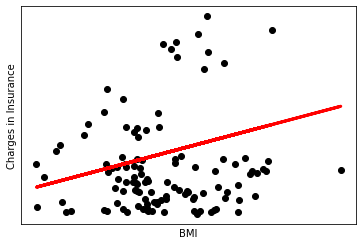

In [160]:
plt.scatter(X_test_scaled, y_test,  color='black')
plt.plot(X_test_scaled, predictedY, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel('BMI')
plt.ylabel('Charges in Insurance')

plt.show()

In [161]:
#Mostramos detalles de p values sobre el modelo
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train_scaled)

fitModel = mod.fit()

fitModel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.025     
Dependent Variable:     charges          AIC:                         5274.4215 
Date:                   2021-04-20 17:54 BIC:                         5277.8726 
No. Observations:       233              Log-Likelihood:              -2636.2   
Df Model:               1                F-statistic:                 6.854     
Df Residuals:           232              Prob (F-statistic):          0.00943   
R-squared (uncentered): 0.029            Scale:                       3.9518e+08
------------------------------------------------------------------------------------
              Coef.        Std.Err.       t        P>|t|       [0.025        0.975] 
------------------------------------------------------------------------------------
bmi         3409.3773     1302.3193     2.6179     0.0094     843.4931     5975.2615
--------------------------------------------------------------------------------
Omnibus:                   26.621            Durbin-Watson:               0.862 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            33.061
Skew:                      0.911             Prob(JB):                    0.000 
Kurtosis:                  2.713             Condition No.:               1     
================================================================================

"""

## Modelo 3 Varios valores

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
lrm = LinearRegression().fit(X_train_scaled2, y_train2)
print(lrm)

LinearRegression()


In [164]:
lrm.score(X_train_scaled2,y_train2)

0.7741899333988495

In [165]:
lrm.coef_

array([ 4.13451175e+03,  2.15896748e+03,  2.94012762e+02,  3.35494541e+02,
        9.81741239e+03,  3.00797246e+02,  2.95485359e+02, -5.74129742e+02,
       -4.38410777e+00])

In [166]:

predictedY2 = lrm.predict(X_test_scaled2)
print(predictedY2)

[ 4206.76885918 24355.58172985  8997.74847716  5172.75683954
 14790.38782696 36748.63690171 19752.47298394 27516.36062981
  7488.37278813 28734.80476766  5645.72010959   356.27042474
  5933.18753145  7882.36770035 10074.64037273  6937.23892444
  8502.48073162  2259.75804741  4296.5445766  14772.35791849
  2546.95736311  6558.07023883   702.54189477 14301.99325143
 32655.00543314 25370.79544306 12242.67817432 11422.50805159
  5409.8363929  10379.7284622  33719.71170179 13427.92709048
  3501.46433695  -353.21946277  -836.50952566 28492.75472089
 37685.03708527  2897.99401876  6362.65090795 21925.97130998
  8999.63221727  4949.71061416 10126.8077358   9361.12025067
 40253.119812    5413.67965964 40891.45663843  3253.68538491
 11461.1836308  11327.35562785 39172.71581781  6981.39543387
 13975.81585448 36834.95964922  1574.03974297  8528.17267524
  3953.16474692  1032.28725766 11190.24836358 11597.78300501
 16589.83302523  4731.08862036 29093.63734804  9609.3881943
 34466.04747526 11501.451

In [167]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test2, predictedY2))

Mean squared error: 38972886.53


In [168]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test2, predictedY2))

Mean absolute error: 4413.47


In [169]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test2, predictedY2))

Coefficient of determination: 0.76


In [170]:
#Mostramos detalles de p values sobre el modelo
import statsmodels.api as sm

mod = sm.OLS(y_train2,X_train2)

fitModel = mod.fit()

fitModel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                 OLS               Adj. R-squared:      0.766     
Dependent Variable:    charges           AIC:                 4729.2722 
Date:                  2021-04-20 17:54  BIC:                 4760.3316 
No. Observations:      233               Log-Likelihood:      -2355.6   
Df Model:              8                 F-statistic:         96.00     
Df Residuals:          224               Prob (F-statistic):  4.80e-68  
R-squared:             0.774             Scale:               3.6821e+07
------------------------------------------------------------------------
               Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
------------------------------------------------------------------------
age            287.4622   28.2790 10.1652 0.0000    231.7354    343.1891
bmi            386.6634   74.0095  5.2245 0.0000    240.8195    532.5072
sex_encoded    588.4647  822.3368  0.7156 0.4750  -1032.0412   2208.9706
children       279.3647  335.2546  0.8333 0.4056   -381.2916    940.0211
smoker       23266.4198  954.2599 24.3816 0.0000  21385.9447  25146.8949
(0,)        -14618.0093 2587.0600 -5.6504 0.0000 -19716.0982  -9519.9205
(1,)        -14622.5439 2546.3512 -5.7425 0.0000 -19640.4115  -9604.6762
(2,)        -16586.0502 2653.1326 -6.2515 0.0000 -21814.3424 -11357.7580
(3,)        -15316.5974 2616.1159 -5.8547 0.0000 -20471.9441 -10161.2508
------------------------------------------------------------------------
Omnibus:                 43.636         Durbin-Watson:            1.922 
Prob(Omnibus):           0.000          Jarque-Bera (JB):         69.462
Skew:                    1.046          Prob(JB):                 0.000 
Kurtosis:                4.667          Condition No.:            656   
========================================================================

"""

## Modelo 4 y 5 Polinomial repitiendo datos 2 y 3

In [180]:
#Referencia de https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2
#Modelo

In [181]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=5
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [182]:
polyreg.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

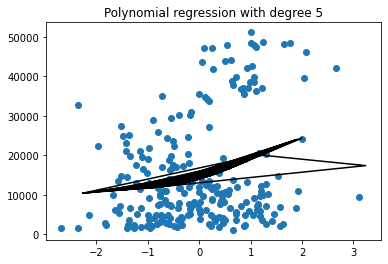

In [183]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train_scaled,y_train)
plt.plot(X_test_scaled,polyreg.predict(X_test_scaled),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [184]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, polyreg.predict(X_test_scaled)))

Mean squared error: 131936292.65


In [185]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, polyreg.predict(X_test_scaled)))

Mean absolute error: 9639.10


In [186]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, polyreg.predict(X_test_scaled)))

Coefficient of determination: -0.14


In [ ]:
# Modelo 5

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=6
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

In [204]:
polyreg.fit(X_train_scaled2, y_train2)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

In [205]:
len(X_train_scaled2)

233

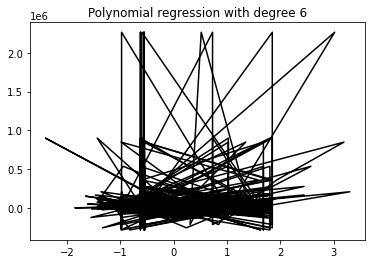

In [206]:
import matplotlib.pyplot as plt
plt.figure()
#plt.scatter(X_train_scaled2,y_train2)
plt.plot(X_test_scaled2,polyreg.predict(X_test_scaled2),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [207]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test2, polyreg.predict(X_test_scaled2)))

Mean squared error: 65854489684.86


In [208]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test2, polyreg.predict(X_test_scaled2)))

Mean absolute error: 83296.85


In [209]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test2, polyreg.predict(X_test_scaled2)))

Coefficient of determination: -399.60
